In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/StudyHoursMachineLeraning/Data_Set/2-multiplegradesdataset.csv')
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Study Hours,50.0,3.668,1.401230,1.1,2.675,3.60,4.500,6.8
Sleep Hours,50.0,7.022,0.874419,4.4,6.500,7.05,7.575,8.6
Attendance Rate,50.0,89.736,4.924813,80.4,85.625,90.10,92.550,100.0
Social Media Hours,50.0,3.090,0.896990,1.5,2.225,3.20,3.575,5.7
Exam Score,50.0,76.070,11.709150,56.9,68.075,73.55,84.175,100.0


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [5]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

In [6]:
df.corr(numeric_only=True)

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


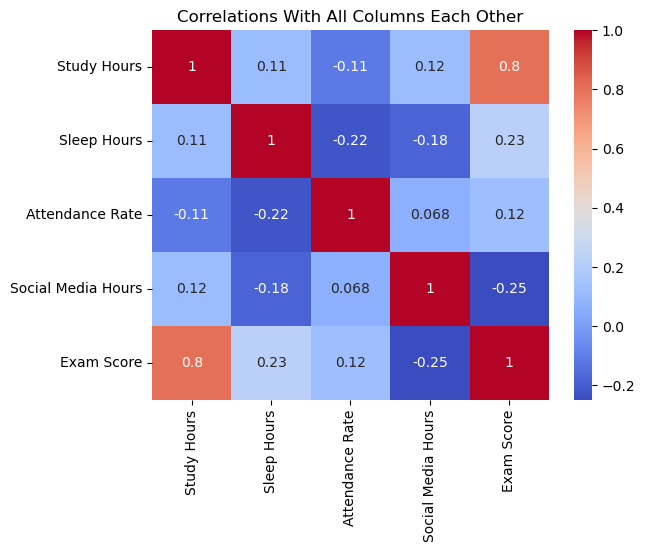

In [7]:
sns.heatmap(df.corr(numeric_only=True), cmap = 'coolwarm', annot = True)
plt.title('Correlations With All Columns Each Other')
plt.show()

<Figure size 1500x1000 with 0 Axes>

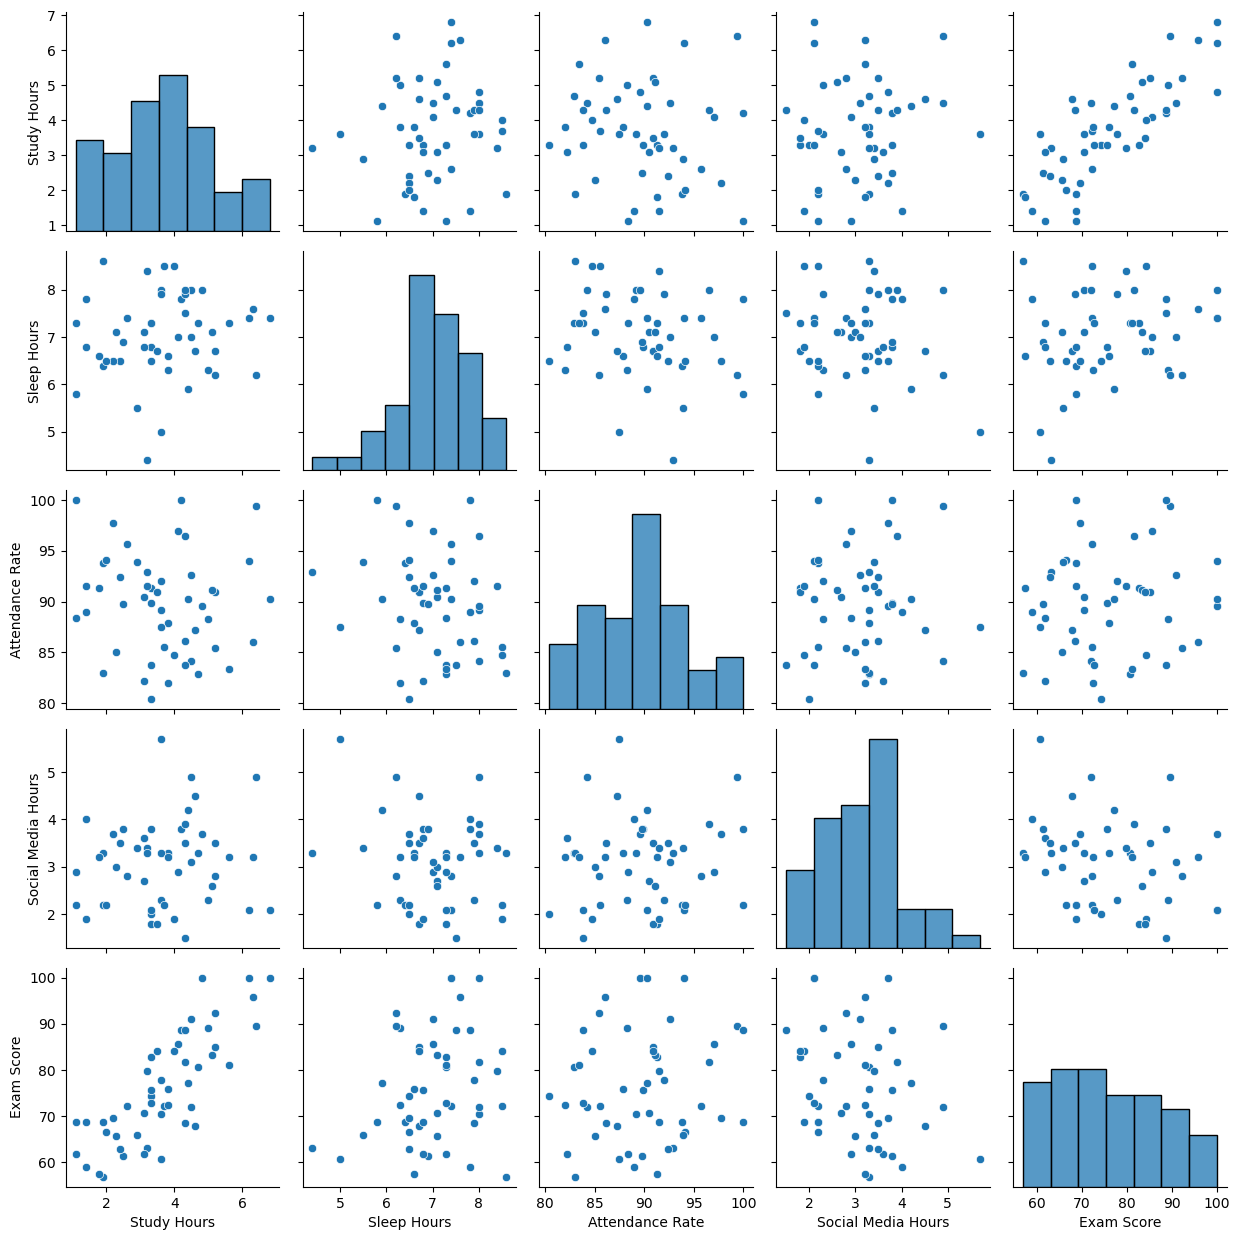

In [8]:
plt.figure(figsize = (15,10))
sns.pairplot(data = df)

plt.tight_layout()
plt.show()

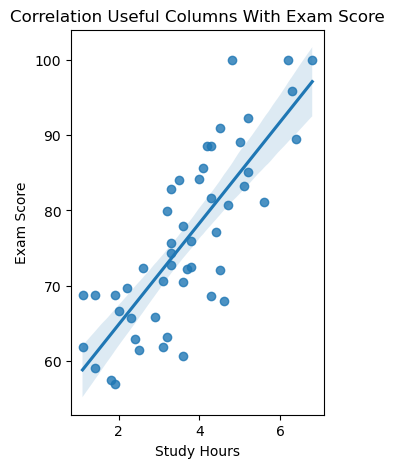

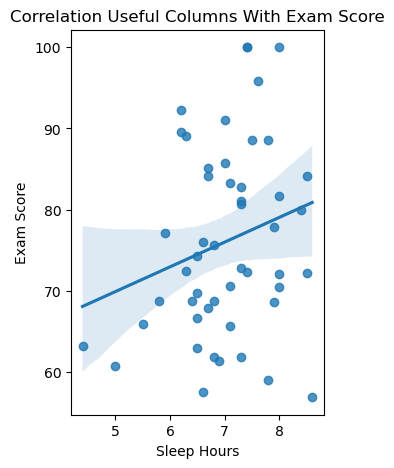

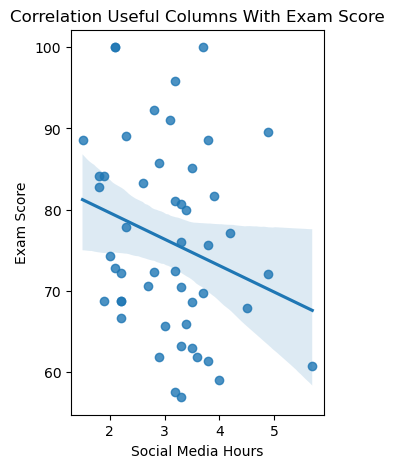

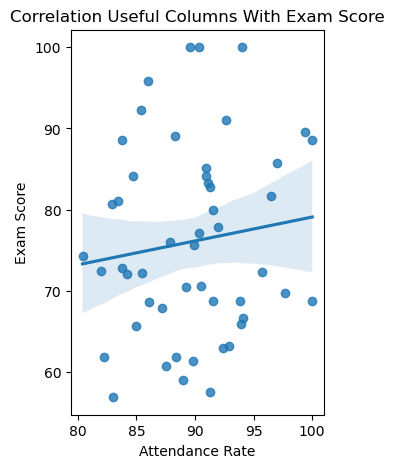

In [9]:
for i in range(0,4):
    plt.figure(figsize = (15,5))
    col = [df['Study Hours'], df['Sleep Hours'], df['Social Media Hours'], df['Attendance Rate']]
    plt.subplot(1,4,i+1)
    sns.regplot(x = col[i], y = df['Exam Score'])
    plt.title('Correlation Useful Columns With Exam Score')
    plt.show()

In [10]:
# independet and dependet feature
# First Way
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Second Way
'''
X = df[['Study Hours','Sleep Hours','Social Media Hours','Attendance Rate']]
y = df['Exam Score']
'''
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [11]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.44581716, -1.30709018,  0.14520109,  1.25025263],
       [-0.11584225,  1.14918667, -0.10632836,  0.20595809],
       [-1.87102793,  0.33042772, -0.28925887, -0.25817282],
       [-0.32646454,  0.33042772,  0.37386423, -1.53453281],
       [ 1.77975828,  0.68132441, -0.83805039,  0.08992536],
       [ 1.8499657 , -0.95619349,  2.22603563,  2.06248171],
       [ 0.37560974,  1.14918667,  1.56291254,  0.90215445],
       [-0.32646454,  0.33042772, -1.34110929, -1.18643463],
       [ 1.28830629,  0.33042772, -1.43257455,  0.08992536],
       [-0.39667196,  1.61704893,  0.41959685,  0.32199082],
       [ 0.72664687,  1.14918667, -0.0148631 ,  0.670089  ],
       [-0.88812395, -0.13743454,  0.03086952,  0.78612172],
       [-0.39667196, -3.06157365,  0.73972525,  0.20595809],
       [ 1.00747658, -0.95619349, -0.97524828, -0.37420554],
       [ 2.13079541,  0.44739328,  0.14520109, -1.18643463],
       [ 0.65643944,  0.33042772, -1.54690612,  0.20595809],
       [-1.37957594, -0.

In [13]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
X_test[0]

array([-1.87102793, -1.42405575,  2.36323351, -1.0704019 ])

In [15]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [16]:
new_student = [[4,10,74,12]]

In [17]:
new_student_scaled = sc.transform(new_student)
new_student_scaled

C:\Users\Mehmet Ersolak\.conda\envs\veriBilimi\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.16498745,  3.48849796, -3.58200803, 10.30080529]])

In [18]:
regression.predict(new_student_scaled)

array([36.23854021])

In [19]:
# prediction
y_pred = regression.predict(X_test)
y_pred

array([65.20231057, 84.16613164, 64.95827287, 69.10443168, 72.32880266,
       83.14929328, 63.79238736, 83.41984016, 82.31003584, 68.25083429])

In [20]:
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2 = r2_score(y_test, y_pred)
#accuracy = accuracy_score(y_pred,y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print('mse', mse)
print('mae', mae)
print('rmse', rmse)

print('r2_score', r2)
#print('Accuracy', accuracy)

mse 14.744713821185451
mae 3.17006740662626
rmse 3.8398846103998294
r2_score 0.8702442761946606


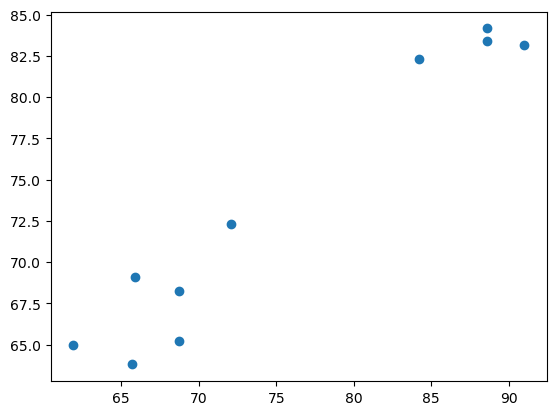

In [21]:
plt.scatter(y_test,y_pred)
plt.show()

In [22]:
residuals = y_test - y_pred
print(residuals)

13    3.497689
39    4.433868
30   -3.058273
45   -3.204432
17   -0.228803
48    7.850707
26    1.907613
25    5.180160
32    1.889964
19    0.449166
Name: Exam Score, dtype: float64


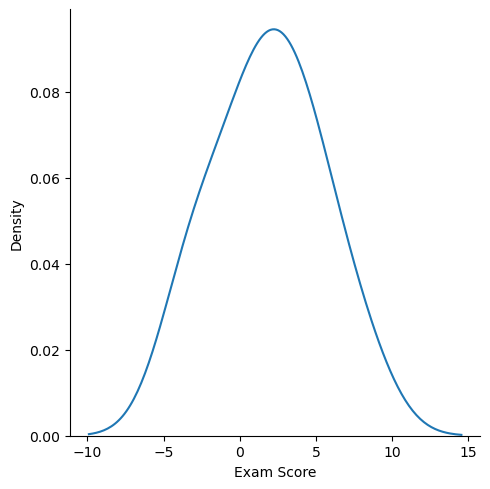

In [23]:
sns.displot(residuals, kind='kde')
plt.show()

In [24]:
print('Coefficient ', regression.coef_)
print('Intercept ', regression.intercept_)
print(f'Linear Regression Equation----->  y = {regression.intercept_} + {regression.coef_} * X')

Coefficient  [10.11954143  1.22980868  2.46755688 -3.60019752]
Intercept  76.2025
Linear Regression Equation----->  y = 76.2025 + [10.11954143  1.22980868  2.46755688 -3.60019752] * X
